In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plot_kwds = {'alpha' : 0.25, 's' : 10, 'linewidths':0}
from pylab import rcParams

import time

rcParams['figure.figsize'] = 14,6

plt.style.use('ggplot')


%matplotlib inline

#### 7 days

In [2]:
df = pd.read_csv('BaynesSoundMooring_5mbss_ConductivityTemperatureDepth_20200117T030000Z_20200119T235959Z-NaN.csv',skipinitialspace=True)
df.rename(columns={df.columns[0]: 'UTC time', df.columns[1]: 'Conductivity',df.columns[15]: 'Temperature'},inplace=True)
X = df[['Conductivity','Temperature']].values

In [3]:
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA

# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(X) 
  
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 
  
# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 

In [4]:
from sklearn import mixture
bic = []
lowest_bic = np.infty

n_components_range = range(1, 7)
cv_types = ["spherical", "tied", "diag", "full"]
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(
            n_components=n_components, covariance_type=cv_type
        )
        gmm.fit(X_principal)
        bic.append(gmm.bic(X_principal))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm
            
print(
    f"Selected GMM: {best_gmm.covariance_type} model, "
    f"{best_gmm.n_components} components"
)

Selected GMM: full model, 6 components


In [5]:
gmm_model = mixture.GaussianMixture(n_components=6, covariance_type='full')

s1 = time.time()

y_gm = gmm_model.fit(X_principal)

e1 = time.time()
print("Training time = {}".format(e1 - s1))

Training time = 26.44744873046875


In [6]:
labels = y_gm.predict(X_principal)
frame = pd.DataFrame(X_principal)
frame['cluster'] = labels
frame['cluster'].value_counts()

1    58186
5    55186
3    39782
4    33810
0    31886
2    26554
Name: cluster, dtype: int64

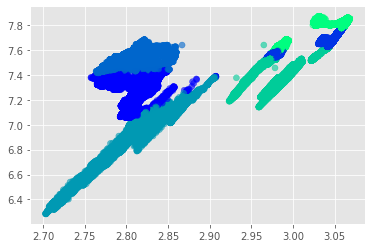

In [7]:
# Visualizing the clustering 
plt.scatter(X[:,0], X[:,1],  
           c = labels, cmap =plt.cm.winter, alpha = 0.6) 
plt.show() 

#### 14 days

In [8]:
df = pd.read_csv('BaynesSoundMooring_40mbss_ConductivityTemperatureDepth_20200305T000000Z_20200313T210509Z-NaN.csv',skipinitialspace=True)
df.rename(columns={df.columns[0]: 'UTC time', df.columns[1]: 'Conductivity',df.columns[15]: 'Temperature'},inplace=True)
X = df[['Conductivity','Temperature']].values

In [9]:
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA

# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(X) 
  
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 
  
# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 

In [10]:
from sklearn import mixture
bic = []
lowest_bic = np.infty

n_components_range = range(1, 7)
cv_types = ["spherical", "tied", "diag", "full"]
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(
            n_components=n_components, covariance_type=cv_type
        )
        gmm.fit(X_principal)
        bic.append(gmm.bic(X_principal))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm
            
print(
    f"Selected GMM: {best_gmm.covariance_type} model, "
    f"{best_gmm.n_components} components"
)

Selected GMM: full model, 6 components


In [11]:
gmm_model = mixture.GaussianMixture(n_components=6, covariance_type='full')

s1 = time.time()

y_gm = gmm_model.fit(X_principal)

e1 = time.time()
print("Training time = {}".format(e1 - s1))

Training time = 34.06992030143738


In [12]:
labels = y_gm.predict(X_principal)
frame = pd.DataFrame(X_principal)
frame['cluster'] = labels
frame['cluster'].value_counts()

0    252216
1    217112
5    104058
3     75353
4     72594
2     32971
Name: cluster, dtype: int64

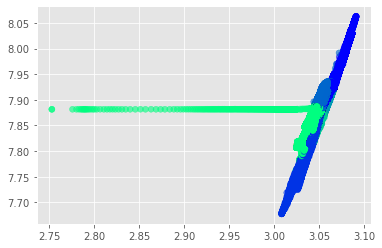

In [13]:
# Visualizing the clustering 
plt.scatter(X[:,0], X[:,1],  
           c = labels, cmap =plt.cm.winter, alpha = 0.6) 
plt.show() 